In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("file.csv")
df

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...,...
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [44]:
data = df[["tweets" , "labels"]]
data

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,chatgpt is being disassembled until it can onl...,bad
219292,2023 predictions by #chatGPT. Nothing really s...,bad


Removing link that begin with https

In [45]:
list = data["tweets"].str.split("https:")
text = [text[0] for text in list]
data["tweets"] = text
data


C:\Users\oessa\AppData\Local\Temp\ipykernel_12236\336629573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweets"] = text


,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialogue,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialogue,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad
...,...,...
219289,Other Software Projects Are Now Trying to Repl...,bad
219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,chatgpt is being disassembled until it can onl...,bad
219292,2023 predictions by #chatGPT. Nothing really s...,bad


In [46]:
import re
s = r"[A-Za-z 0-9]"
text2=[]
for i in text:
    sentence = ""
    for j in i:
        if (re.match(s , j)):
            sentence += j
    text2.append(sentence)
text2 

['ChatGPT Optimizing Language Models for Dialogue ',
 'Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it ',
 'ChatGPT Optimizing Language Models for Dialogue ',
 'THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone ',
 'As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  ',
 'Just launched ChatGPT our new AI system which is optimized for dialogue ',
 'As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now n n',
 'ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo ',
 '0penAl just deployed a thing Ive been helping build the last couple of months its a chatbot based on GPT 3 Im really excited to share this vln',
 'Research preview of our newest model ChatGPTnnWere trying something new with this preview Free and immediately available for everyone no wa

In [47]:

rep_list = ['\U0001fae1', '\\n', '@', '#', '\xa0', '***']

for i in text2:
    for j in rep_list:
        if j in i:
            i.replace(j,'')
text2

['ChatGPT Optimizing Language Models for Dialogue ',
 'Try talking with ChatGPT our new AI system which is optimized for dialogue Your feedback will help us improve it ',
 'ChatGPT Optimizing Language Models for Dialogue ',
 'THRILLED to share that ChatGPT our new model optimized for dialog is now public free and accessible to everyone ',
 'As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now  ',
 'Just launched ChatGPT our new AI system which is optimized for dialogue ',
 'As of 2 minutes ago OpenAI released their new ChatGPT nnAnd you can use it right now n n',
 'ChatGPT coming out strong refusing to help me stalk someone but agreeing providing that someone is Waldo ',
 '0penAl just deployed a thing Ive been helping build the last couple of months its a chatbot based on GPT 3 Im really excited to share this vln',
 'Research preview of our newest model ChatGPTnnWere trying something new with this preview Free and immediately available for everyone no wa

C:\Users\oessa\AppData\Local\Temp\ipykernel_12236\2161383305.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['labels'] = data['labels'].apply(lambda x:mark_sentiment(x))


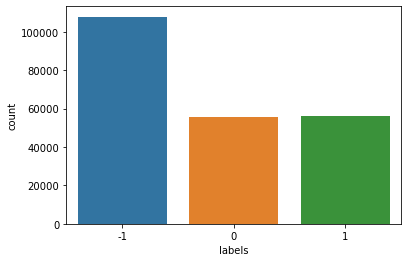

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
def mark_sentiment(rating):
    if(rating == "neutral"):
        return 0
    elif (rating=="bad"):
        return -1
    else:
        return 1
cleaned = data
cleaned['labels'] = data['labels'].apply(lambda x:mark_sentiment(x))
cleaned['labels'].value_counts()
sns.countplot(data=cleaned, x='labels')
plt.show()


In [49]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
lem = WordNetLemmatizer()
st = PorterStemmer()
def lemNLTK(text):
    # tokenize
    tokens = TextBlob(text)
    words = tokens.words
    clean = []
    for w in words:
        ty = lem.lemmatize(w)
        clean.append(ty)
    return " ".join(clean)
lemNLTK("chatgpt is not better than our minds")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oessa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'chatgpt is not better than our mind'

In [50]:
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [51]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stop_words and len(w) >= 2])
remove_stop_words("chatgpt is not better than our minds")

'chatgpt better minds'

In [52]:
def clean_text(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    ## Convert text to lowercases
    text = text.lower()
    ## Remove stop words
    text = remove_stop_words(text)
    ## Remove numbers
    #text = re.sub("\d+", " ", text)

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    #Lemmatization
    text = lemNLTK(text)
    return text

cleaned['tweets'] = cleaned['tweets'].apply(lambda x:clean_text(x))
cleaned.head()

C:\Users\oessa\AppData\Local\Temp\ipykernel_12236\1530078450.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['tweets'] = cleaned['tweets'].apply(lambda x:clean_text(x))


,tweets,labels
0,chatgpt optimizing language model dialogue,0
1,try talking chatgpt new ai system optimized di...,1
2,chatgpt optimizing language model dialogue,0
3,thrilled share chatgpt new model optimized dia...,1
4,minute ago openai released new chatgpt nand us...,-1


In [53]:
print("Duplicated values: " , cleaned.duplicated().sum())

cleaned.drop_duplicates(inplace=True)
print(cleaned.info())

Duplicated values:  30985
<class 'pandas.core.frame.DataFrame'>
Int64Index: 188309 entries, 0 to 219293
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  188309 non-null  object
 1   labels  188309 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ MB
None


C:\Users\oessa\AppData\Local\Temp\ipykernel_12236\990950499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.drop_duplicates(inplace=True)


In [54]:
text_len = []
for text in cleaned.tweets:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
cleaned['tweet_len'] = text_len
cleaned.sort_values(by=['tweet_len'], ascending=False)
#cleaned.head()

C:\Users\oessa\AppData\Local\Temp\ipykernel_12236\1566766415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['tweet_len'] = text_len


,tweets,labels,tweet_len
185980,chatgpt play chess badly played white n1 e4 e5...,1,49
218395,recap newsmakers 2022 na argentina nb nc chatg...,1,48
193030,except wing profit shared wan 40 profit daily ...,1,47
135096,good morning n6 13 chatgpt academic essay n6 2...,0,47
175611,next coin pump like fet wing soon range thank ...,1,45
...,...,...,...
130690,course,-1,1
104379,name,-1,1
1710,,-1,0
167,,0,0


In [55]:
cleaned = cleaned[cleaned["tweet_len"] > 0]
cleaned.sort_values(by=['tweet_len'], ascending=False)

,tweets,labels,tweet_len
185980,chatgpt play chess badly played white n1 e4 e5...,1,49
218395,recap newsmakers 2022 na argentina nb nc chatg...,1,48
193030,except wing profit shared wan 40 profit daily ...,1,47
135096,good morning n6 13 chatgpt academic essay n6 2...,0,47
175611,next coin pump like fet wing soon range thank ...,1,45
...,...,...,...
18967,twitter,-1,1
60852,goog,-1,1
136114,cheatgpt,-1,1
78733,yeeha,1,1


In [81]:
cleaned.labels.value_counts()

-1    88064
 1    51998
 0    48244
Name: labels, dtype: int64

In [86]:
cleaned = cleaned.dropna(axis=0)
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188306 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweets     188306 non-null  object
 1   labels     188306 non-null  int64 
 2   tweet_len  188306 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.7+ MB


In [89]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

x= cleaned["tweets"]
y = cleaned["labels"]

x_train , x_test, y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=42) 
print("training size: ",len(x_train))
print("testing size: ",len(y_test))


training size:  150644
testing size:  37662
